# Importing Libraries

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

from scipy.special import lmbda
from scipy.stats import chi2_contingency, f_oneway

# Reading data

In [2]:
def read_data(filename)->pd.DataFrame:
    path=os.path.join("..","data",filename)
    return pd.read_csv(path)
    

In [3]:
train=read_data("train.csv")

In [4]:
train

,game_name,genres,release_year,number_of_reviews_from_purchased_people,link,developer,publisher,review,hours_played,helpful,funny,recommendation,username,user_id,game_id
0,Terraria,"['open_world_survival_craft', 'sandbox', 'surv...",2011,1061260.0,https://store.steampowered.com/app/105600/Terr...,['Re-Logic'],['Re-Logic'],2017 It's good,2857,4,0,Recommended,Rabbit,334620,181
1,Golf It!,"['multiplayer', 'mini_golf', 'golf', 'casual',...",2023,22129.0,https://store.steampowered.com/app/571740/Golf...,['Perfuse Entertainment'],['Perfuse Entertainment'],NaN,6,0,0,Recommended,Katti,217807,79
2,PAYDAY 2,"['co-op', 'action', 'fps', 'heist', 'multiplay...",2013,431019.0,https://store.steampowered.com/app/218620/PAYD...,['OVERKILL - a Starbreeze Studio.'],['Starbreeze Publishing AB'],2023 This game is soooo goooood and better tha...,45,151,5,Recommended,:),9197,131
3,"Warhammer 40,000: Rogue Trader","['cinematic', 'online_co-op', 'multiplayer', '...",2023,13539.0,https://store.steampowered.com/app/2186680/War...,['Owlcat Games'],['Owlcat Games'],the combat is garbadge and the RNG is rigged.,84,0,0,Not Recommended,v4lexx,634503,217
4,Fallout 76,"['open_world', 'dark_comedy', 'multiplayer', '...",2020,61554.0,https://store.steampowered.com/app/1151340/Fal...,['Bethesda Game Studios'],['Bethesda Softworks'],Based on the amount of things for sale in this...,149,2,1,Not Recommended,L3X,232185,67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
724950,Grand Mountain Adventure: Wonderlands,"['simulation', 'adventure', 'sports', 'casual'...",2022,196.0,https://store.steampowered.com/app/1247360/Gra...,['Toppluva AB'],['Microids'],2022 This is my new favourite time sink. I've ...,37,0,0,Recommended,Smike,382373,82
724951,Grand Mountain Adventure: Wonderlands,"['simulation', 'adventure', 'sports', 'casual'...",2022,196.0,https://store.steampowered.com/app/1247360/Gra...,['Toppluva AB'],['Microids'],"2022 This Game is Amazing, if you like Winter ...",21,0,0,Recommended,8bWaffle,8848,82
724952,Grand Mountain Adventure: Wonderlands,"['simulation', 'adventure', 'sports', 'casual'...",2022,196.0,https://store.steampowered.com/app/1247360/Gra...,['Toppluva AB'],['Microids'],2022 good,46,0,0,Recommended,xDmochi,642060,82
724953,Grand Mountain Adventure: Wonderlands,"['simulation', 'adventure', 'sports', 'casual'...",2022,196.0,https://store.steampowered.com/app/1247360/Gra...,['Toppluva AB'],['Microids'],"2022 *Slapping someone to get a speed boost""Ho...",24,0,0,Recommended,Pizza Margherita,321441,82


In [5]:
train.columns

Index(['game_name', 'genres', 'release_year',
       'number_of_reviews_from_purchased_people', 'link', 'developer',
       'publisher', 'review', 'hours_played', 'helpful', 'funny',
       'recommendation', 'username', 'user_id', 'game_id'],
      dtype='object')

# Overview Analysis

In [6]:
train.shape

(724955, 15)

In [7]:
train.duplicated().sum()

0

In [8]:
train.assign(
    game_id= train.game_id.astype(str),
    user_id=train.user_id.astype(str),
    release_year=train.release_year.astype(str),
).select_dtypes("object").describe()

,game_name,genres,release_year,link,developer,publisher,review,recommendation,username,user_id,game_id
count,724955,724955,724955,724955,724955,724955,724548,724955,724946,724955,724955
unique,227,227,18,227,189,156,669102,2,666530,666536,227
top,Party Animals,"['casual', 'multiplayer', 'funny', 'cute', 'pa...",2023,https://store.steampowered.com/app/1260320/Par...,['Valve'],['Electronic Arts'],good,Recommended,123,4178,134
freq,4761,4761,103148,4761,15260,42295,943,580435,56,56,4761


In [9]:
train.assign(
    game_id= train.game_id.astype(str),
    user_id=train.user_id.astype(str),
).select_dtypes("number").describe()

,release_year,number_of_reviews_from_purchased_people,hours_played,helpful,funny
count,724955.000000,7.249550e+05,724955.000000,724955.000000,7.249550e+05
mean,2019.107007,2.104460e+05,369.570188,21.941403,7.702555e+04
std,4.109969,6.078983e+05,1239.608995,183.550813,1.818748e+07
min,2006.000000,1.080000e+02,0.000000,0.000000,0.000000e+00
25%,2016.000000,2.559900e+04,21.000000,1.000000,0.000000e+00
50%,2020.000000,7.547400e+04,67.000000,2.000000,0.000000e+00
75%,2023.000000,2.176690e+05,237.000000,4.000000,0.000000e+00
max,2024.000000,8.313603e+06,107075.000000,27027.000000,4.294967e+09


In [10]:
game=train[['game_name', 'genres', 'release_year',
       'number_of_reviews_from_purchased_people', 'link', 'developer',
       'publisher']]
game=game.drop_duplicates()

In [11]:
game.columns

Index(['game_name', 'genres', 'release_year',
       'number_of_reviews_from_purchased_people', 'link', 'developer',
       'publisher'],
      dtype='object')

In [12]:
game.select_dtypes(include='object').describe()

,game_name,genres,link,developer,publisher
count,227,227,227,227,227
unique,227,227,227,189,156
top,Terraria,"['open_world_survival_craft', 'sandbox', 'surv...",https://store.steampowered.com/app/105600/Terr...,['Milestone S.r.l.'],['Electronic Arts']
freq,1,1,1,9,13


# Detail Analysis

# game_name 

In [13]:
f"Total unique games are {game.game_name.nunique()}"

'Total unique games are 227'

In [14]:
train.game_name.value_counts().sort_values()[0:10].index

Index(['Shawarma Legend', 'Motordoom',
       'MXGP - The Official Motocross Videogame', '69 Balls',
       'Grand Mountain Adventure: Wonderlands', 'GP Bikes',
       'Train Sim World® 5', 'TrackDayR', 'Golf Peaks',
       'All-In-One Sports VR'],
      dtype='object', name='game_name')

<Axes: title={'center': 'top 10 most reviewed games'}, xlabel='game_name', ylabel='no_of_reviews'>

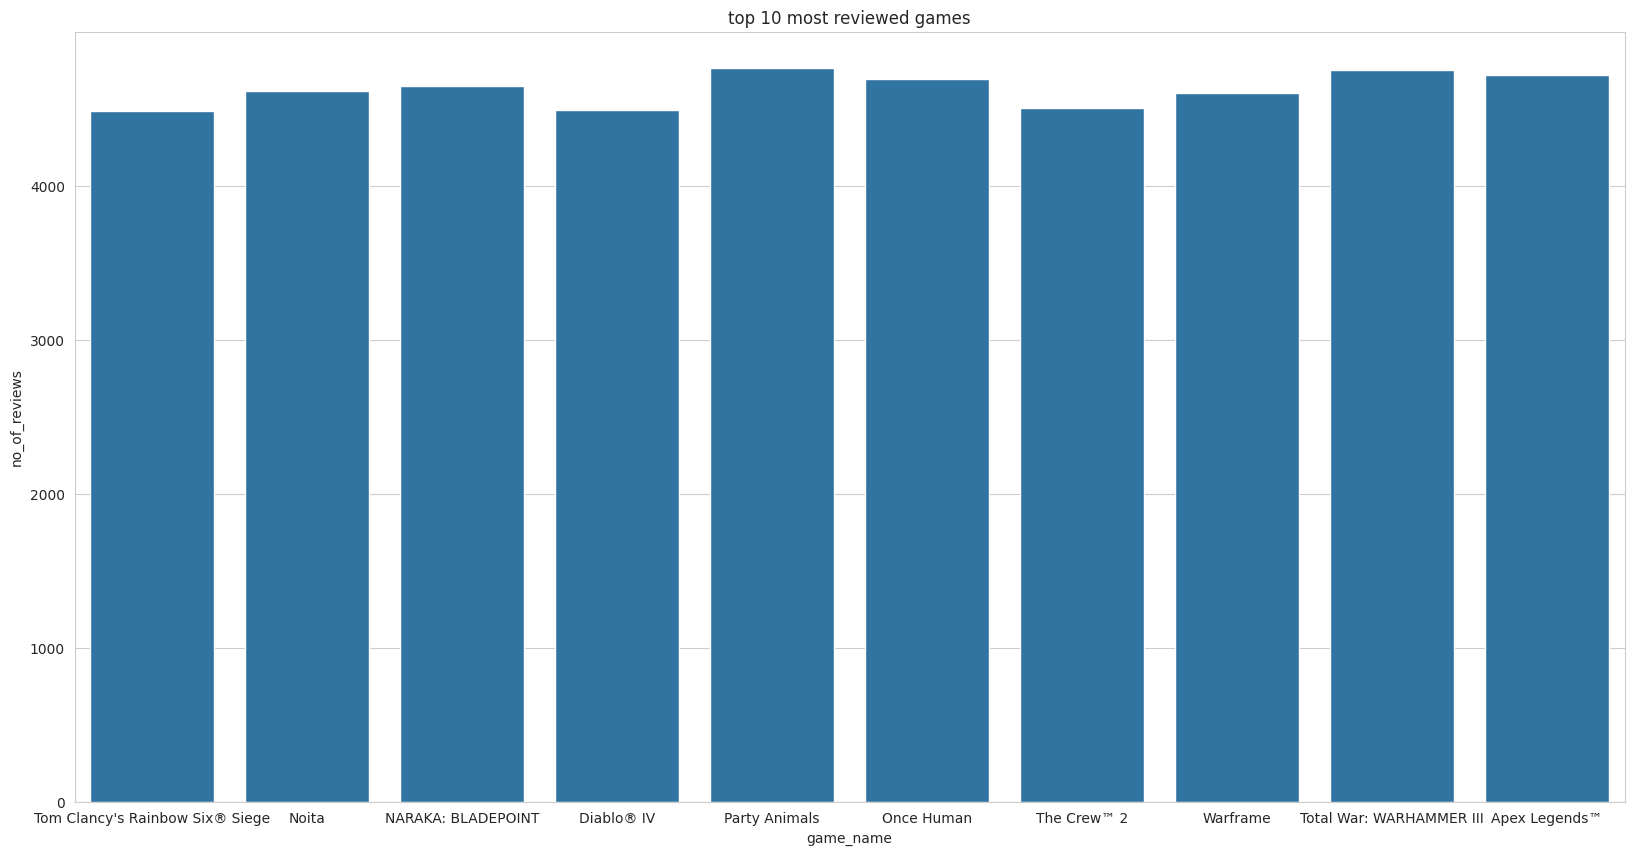

In [15]:
plt.figure(figsize=(20,10))
plt.title("top 10 most reviewed games")
plt.ylabel("no_of_reviews")
sns.countplot(x="game_name", data=train[train["game_id"].isin (train.game_id.value_counts().sort_values(ascending=False)[0:10].index.tolist())])


<Axes: title={'center': 'top 10 least reviewed games'}, xlabel='game_name', ylabel='no_of_reviews'>

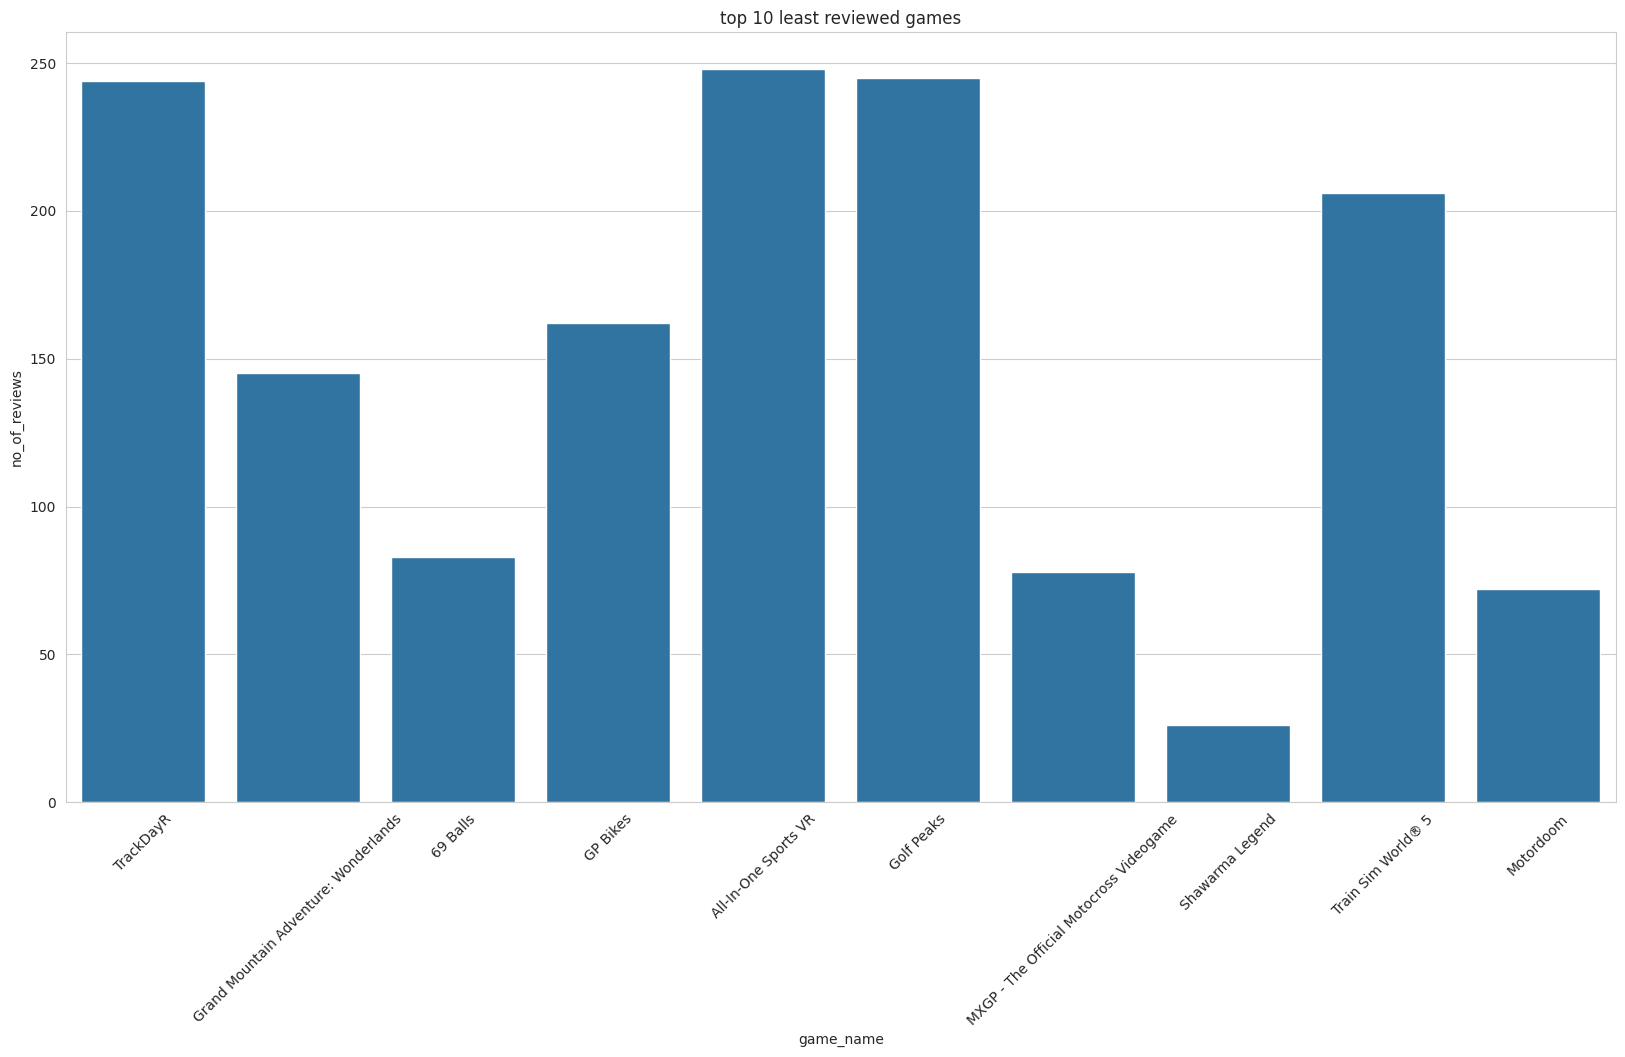

In [16]:
plt.figure(figsize=(20,10))
plt.title("top 10 least reviewed games")
plt.xticks(rotation=45)
plt.ylabel("no_of_reviews")
sns.countplot(x="game_name", data=train[train["game_id"].isin (train.game_id.value_counts().sort_values()[0:10].index.tolist())])

In [17]:
alpha=0.05

In [18]:
contingency_table=pd.crosstab(train.game_id,train.recommendation)

In [19]:
chi2, p, dof, expected = chi2_contingency(contingency_table)

In [20]:
if p < alpha:
    print("Reject the null hypothesis: There is a significant association between game and recommendation.")
else:
    print("Fail to reject the null hypothesis: There is no significant association between game and recommendation.")

Reject the null hypothesis: There is a significant association between game and recommendation.


### Genres

In [21]:
game.genres.sample(10)

746     ['automobile_sim', 'driving', 'open_world', 't...
197     ['online_co-op', 'horror', 'first-person', 'co...
325     ['crpg', 'tactical_rpg', 'turn-based_tactics',...
352     ['survival', 'open_world', 'multiplayer', 'fre...
179     ['great_soundtrack', 'story_rich', 'choices_ma...
95      ['early_access', 'survival', 'open_world', 'di...
136     ['open_world', 'action', 'multiplayer', 'crime...
29      ['card_battler', 'card_game', 'story_rich', 'd...
284     ['simulation', 'immersive_sim', 'casual', 'man...
2409    ['action', 'adventure', 'zombies', 'action-adv...
Name: genres, dtype: object

In [22]:
import ast
all_genres={}
for game_value in game.genres.apply(lambda x: ast.literal_eval(x)):
    for genre in game_value:
        if genre in all_genres:
            all_genres[genre]+=1
        else:
            all_genres[genre]=1

In [23]:
all_genres

{'open_world_survival_craft': 11,
 'sandbox': 68,
 'survival': 39,
 '2d': 33,
 'multiplayer': 160,
 'adventure': 88,
 'pixel_graphics': 14,
 'crafting': 21,
 'building': 35,
 'exploration': 53,
 'co-op': 93,
 'open_world': 88,
 'online_co-op': 60,
 'indie': 72,
 'action': 124,
 'rpg': 56,
 'singleplayer': 173,
 'replay_value': 23,
 'platformer': 8,
 'atmospheric': 71,
 'mini_golf': 6,
 'golf': 6,
 'casual': 53,
 'sports': 63,
 'funny': 39,
 'simulation': 122,
 'level_editor': 5,
 'early_access': 43,
 'local_multiplayer': 14,
 'family_friendly': 30,
 'vr': 20,
 'memes': 6,
 'difficult': 32,
 'strategy': 79,
 'fps': 30,
 'heist': 3,
 'looter_shooter': 9,
 'stealth': 9,
 'crime': 3,
 'shooter': 33,
 'team-based': 18,
 'first-person': 71,
 'great_soundtrack': 46,
 'gun_customization': 2,
 'tactical': 40,
 'pve': 28,
 'cinematic': 9,
 'turn-based_strategy': 24,
 'strategy_rpg': 11,
 'collectathon': 2,
 'dungeon_crawler': 9,
 'space': 19,
 'multiple_endings': 8,
 'tactical_rpg': 9,
 'mystery

In [24]:
genres=pd.Series(all_genres)

In [25]:
genres.sort_values(ascending=False)[0:10]

singleplayer    173
multiplayer     160
action          124
simulation      122
co-op            93
adventure        88
open_world       88
strategy         79
indie            72
atmospheric      71
dtype: int64

<BarContainer object of 20 artists>

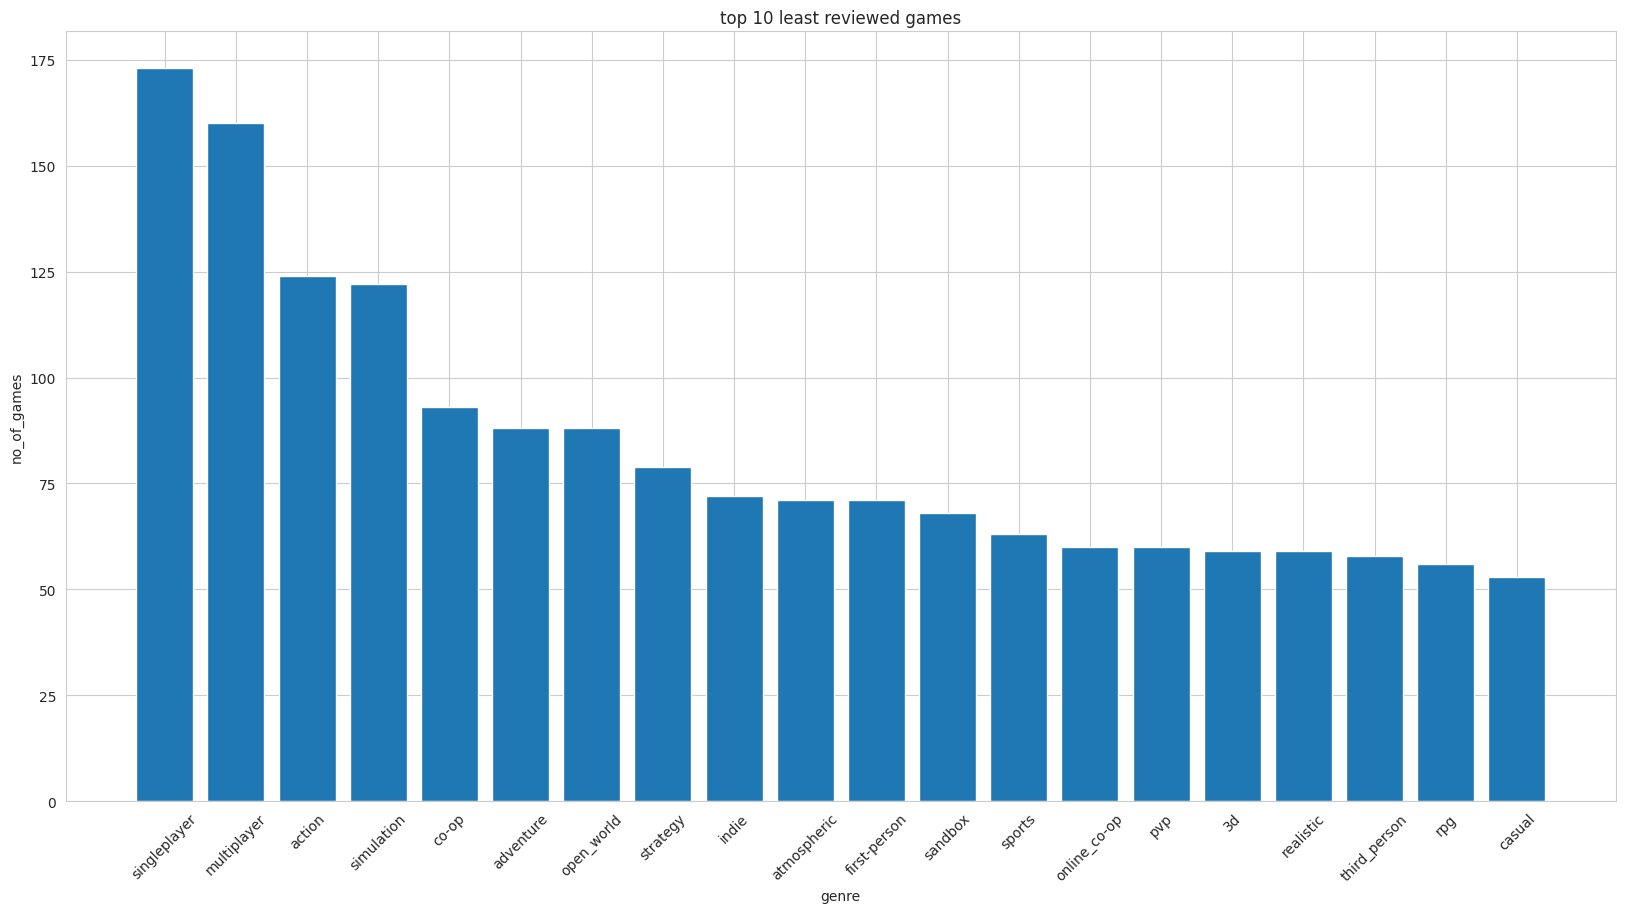

In [26]:
plt.figure(figsize=(20,10))
plt.title("top 10 least reviewed games")
plt.xticks(rotation=45)
plt.ylabel("no_of_games")
plt.xlabel("genre")
plt.bar(x=genres.sort_values(ascending=False)[0:20].index, height=genres.sort_values(ascending=False)[0:20])

# release_year

In [27]:
game.release_year

0        2011
1        2023
2        2013
3        2023
4        2020
         ... 
5555     2017
5581     2024
8225     2024
8746     2024
11184    2012
Name: release_year, Length: 227, dtype: int64

In [28]:
game.release_year.value_counts()

release_year
2024    41
2023    32
2018    23
2022    20
2021    19
2019    15
2020    14
2017    13
2016    12
2015    12
2013     9
2014     5
2011     3
2009     2
2010     2
2006     2
2012     2
2007     1
Name: count, dtype: int64

<BarContainer object of 18 artists>

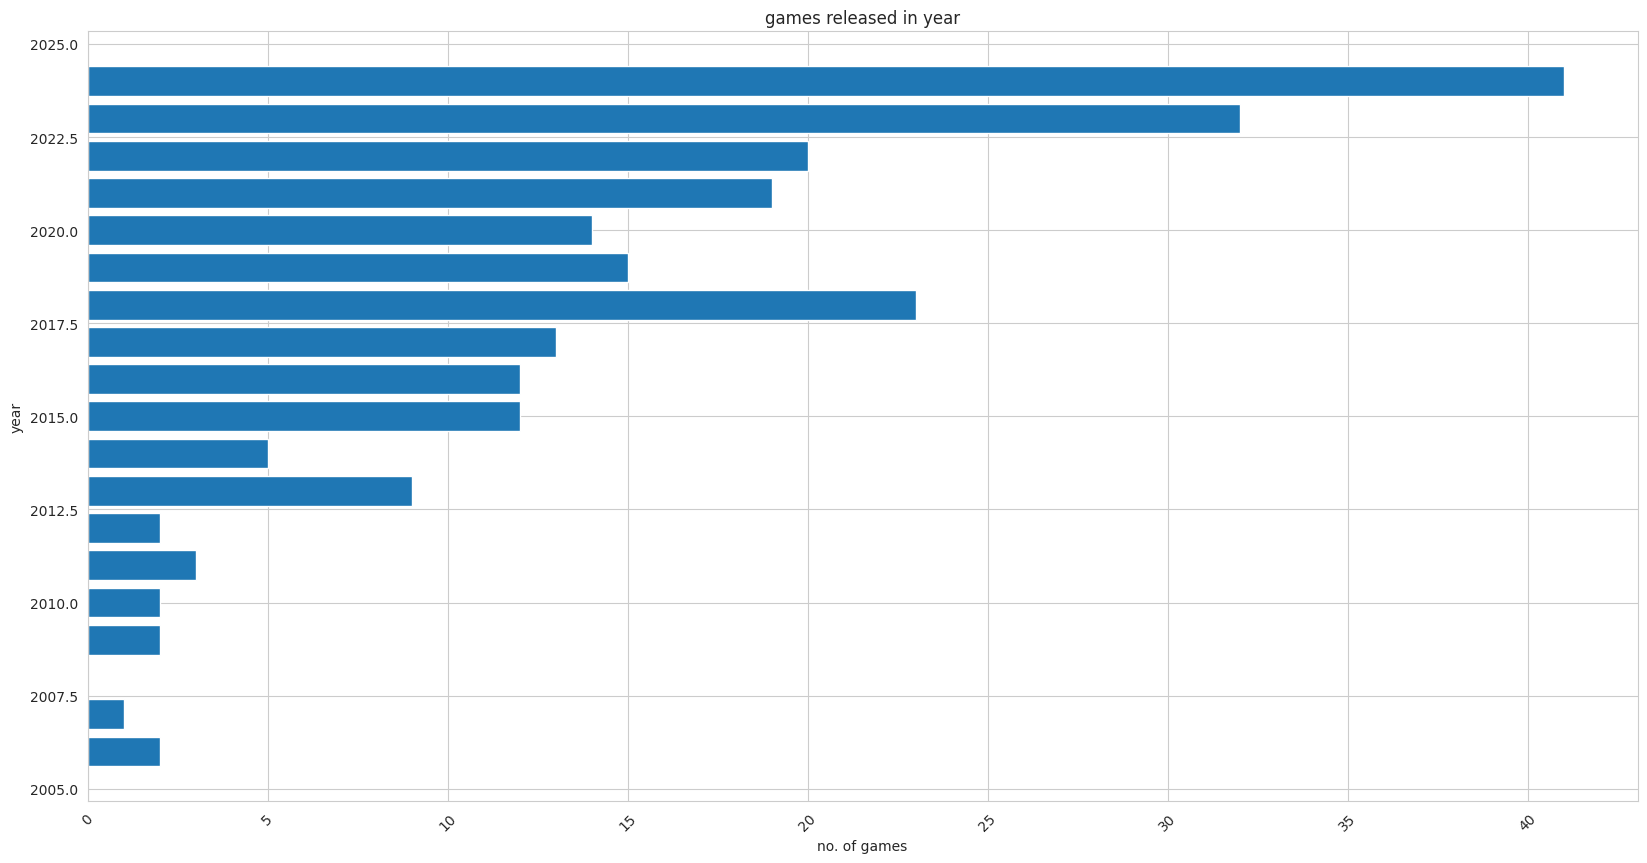

In [29]:
plt.figure(figsize=(20,10))
plt.title("games released in year")
plt.xticks(rotation=45)
plt.ylabel("year")
plt.xlabel("no. of games")
plt.barh(y=game.release_year.value_counts().index,width=game.release_year.value_counts())

In [30]:
contingency_table=pd.crosstab(train.release_year,train.recommendation)

In [31]:
chi2, p, dof, expected = chi2_contingency(contingency_table)

In [32]:
if p < alpha:
    print("Reject the null hypothesis: There is a significant association between released years and recommendation.")
else:
    print("Fail to reject the null hypothesis: There is no significant association between released years and recommendation.")

Reject the null hypothesis: There is a significant association between released years and recommendation.


### number_of_reviews_from_purchased_people

In [33]:
game.number_of_reviews_from_purchased_people

0        1061260.0
1          22129.0
2         431019.0
3          13539.0
4          61554.0
           ...    
5555         838.0
5581         483.0
8225         320.0
8746         108.0
11184    8313603.0
Name: number_of_reviews_from_purchased_people, Length: 227, dtype: float64

### developer

In [34]:
game.developer

0                               ['Re-Logic']
1                  ['Perfuse Entertainment']
2        ['OVERKILL - a Starbreeze Studio.']
3                           ['Owlcat Games']
4                  ['Bethesda Game Studios']
                        ...                 
5555                    ['Milestone S.r.l.']
5581                       ['Eyad Alshafei']
8225                      ['Dovetail Games']
8746                      ['Hobo Cat Games']
11184                              ['Valve']
Name: developer, Length: 227, dtype: object

### review

In [35]:
train.review

0                                            2017 It's good
1                                                       NaN
2         2023 This game is soooo goooood and better tha...
3             the combat is garbadge and the RNG is rigged.
4         Based on the amount of things for sale in this...
                                ...                        
724950    2022 This is my new favourite time sink. I've ...
724951    2022 This Game is Amazing, if you like Winter ...
724952                                            2022 good
724953    2022 *Slapping someone to get a speed boost"Ho...
724954    2022 Simple controls and fun game modes with g...
Name: review, Length: 724955, dtype: object

### hours_played

In [39]:
train.groupby(by=["game_name"])["hours_played"].mean()

game_name
69 Balls                           3.771084
7 Days to Die                    980.102367
ARK: Survival Ascended           304.618160
ARK: Survival Evolved           1933.585440
Age of Empires II (Retired)      364.420791
                                   ...     
Yu-Gi-Oh! Master Duel            312.041583
eFootball™                       171.260931
iRacing                          251.955313
shapez 2                          44.945774
theHunter: Call of the Wild™     215.411538
Name: hours_played, Length: 227, dtype: float64

<BarContainer object of 20 artists>

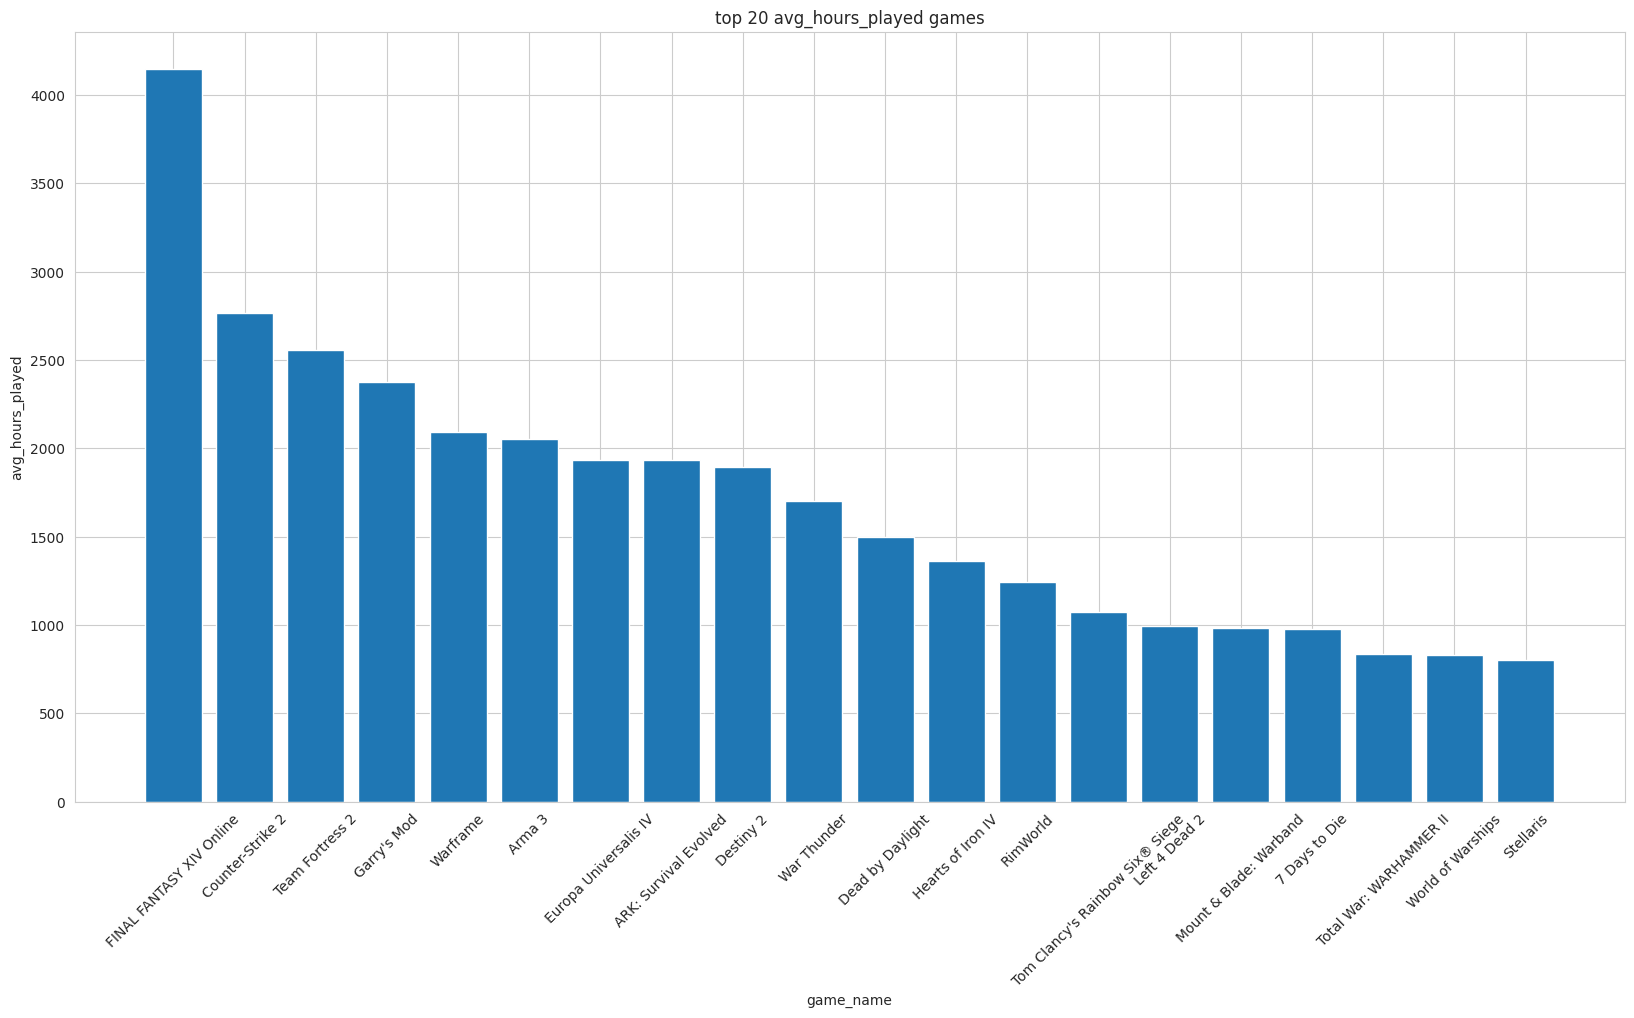

In [45]:
temp=train.groupby(by=["game_name"])["hours_played"].mean().sort_values(ascending=False)[:20]
plt.figure(figsize=(20,10))
plt.xticks(rotation=45)
plt.ylabel("avg_hours_played")
plt.xlabel("game_name")
plt.title("top 20 avg_hours_played games")
plt.bar(x=temp.index, height=temp.values)

In [47]:
train.groupby(by=["game_id","recommendation"])["hours_played"].mean()

game_id  recommendation 
0        Not Recommended       0.750000
         Recommended           3.924051
1        Not Recommended     709.573286
         Recommended        1062.192611
2        Not Recommended     293.842857
                               ...     
224      Recommended         284.396127
225      Not Recommended      28.022727
         Recommended          45.146046
226      Not Recommended     174.737357
         Recommended         222.996958
Name: hours_played, Length: 454, dtype: float64

In [61]:
temp = train.merge(train.groupby(by=["game_id"])["hours_played"].mean(), on="game_id")
anova_result =f_oneway(temp[temp["recommendation"]=="Recommended"]["hours_played_y"],temp[temp["recommendation"]=="Not Recommended"]["hours_played_y"])
print(f'F-statistic: {anova_result.statistic}, P-value: {anova_result.pvalue}')
if anova_result.pvalue < alpha:
    print("rejected null hypothesis: There is a significant association between avg. hours played of game and recommendation.")
else:
    print("Failed to reject null hypothesis: There is not a significant association between avg. hours played of game and recommendation.")
del temp

F-statistic: 1442.473785932279, P-value: 2.53819573e-315
rejected null hypothesis: There is a significant association between avg. hours played of game and recommendation.


In [66]:
temp = train.merge(train.groupby(by=["user_id","genres"])["hours_played"].sum(), on="user_id")
anova_result =f_oneway(temp[temp["recommendation"]=="Recommended"]["hours_played_y"],temp[temp["recommendation"]=="Not Recommended"]["hours_played_y"])
print(f'F-statistic: {anova_result.statistic}, P-value: {anova_result.pvalue}')
if anova_result.pvalue < alpha:
    print("rejected null hypothesis: There is a significant association between the total hours played by user on each genre and recommendation.")
else:
    print("Failed to reject null hypothesis: There is not a significant association between the total hours played by user on each genre and recommendation.")
del temp

F-statistic: 25.015528371182263, P-value: 5.688039762102315e-07
rejected null hypothesis: There is a significant association between the total hours played by user on each genre and recommendation.


### total no. of reviews by user

In [69]:
temp = train.merge(train.groupby(by=["user_id",])["hours_played"].count(), on="user_id")
anova_result =f_oneway(temp[temp["recommendation"]=="Recommended"]["hours_played_y"],temp[temp["recommendation"]=="Not Recommended"]["hours_played_y"])
print(f'F-statistic: {anova_result.statistic}, P-value: {anova_result.pvalue}')
if anova_result.pvalue < alpha:
    print("rejected null hypothesis: There is a significant association between the total no. of reviews by user and recommendation.")
else:
    print("Failed to reject null hypothesis: There is not a significant association between the total no. of reviews by user and recommendation.")
del temp

F-statistic: 0.47200025042904115, P-value: 0.4920686160951596
Failed to reject null hypothesis: There is not a significant association between the total no. of reviews by user and recommendation.


In [35]:
train.columns

Index(['game_name', 'genres', 'release_year',
       'number_of_reviews_from_purchased_people', 'link', 'developer',
       'publisher', 'review', 'hours_played', 'helpful', 'funny',
       'recommendation', 'username', 'user_id', 'game_id'],
      dtype='object')